EDA 
Preparación de datos
Realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada , se comparte un paso a paso  el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento.

In [180]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


In [181]:
#Exploramos el dataset mostrando los priemor 5 registros con head()
df=pd.read_csv("movie_credits.csv")
df.head()
#Verificando nuestro dataframe se puede ver que en movies_credits.csv tenemos belongs_to_collection ,
# budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date	,
# runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return	y crew

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,crew
0,Toy Story Collection,30000000.0,Animation,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995.0,12.451801,John Lasseter
1,NaN,65000000.0,Adventure,8844,en,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,...,104.0,English,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.043035,Larry J. Franco
2,Grumpy Old Men Collection,0.0,Romance,15602,en,A family wedding reignites the ancient feud be...,11.712900,Warner Bros.,United States of America,1995-12-22,...,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.000000,Howard Deutch
3,NaN,16000000.0,Comedy,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,...,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.090760,Forest Whitaker
4,Father of the Bride Collection,0.0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,Sandollar Productions,United States of America,1995-02-10,...,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,0.000000,Alan Silvestri


In [182]:
### Informacion de cada una de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  float64
 2   genres                 45451 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   45451 non-null  object 
 8   production_countries   45451 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       45230 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [183]:
#para tal modelamiento se eliminara algunas columnas que no son necesarias ya que el modelo 
# consiste en recomendar películas a los usuarios basándose en películas similares, 
# por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, se ordenarán según el score de similaridad 
df = df.drop(['belongs_to_collection' ,
'original_language','overview','production_companies','production_countries','release_date',
'spoken_languages','status','tagline','crew'], axis=1 )


In [184]:
#valores nulos de cada columna
df.isnull().sum()

budget            0
genres            0
id                0
popularity        0
revenue           0
runtime         246
title             0
vote_average      0
vote_count        0
release_year      0
return            0
dtype: int64

Estadísticas descriptivas

Mediana : El valor medio en las Columnas, también llamado percentil 50. o 2do cuartil.

1er Cuartil : El percentil 25.

3er Cuartil : El percentil 75.

Mínimo : La observación más pequeña en columnas.

Máximo : La observación más grande en columnas.

In [185]:
#Para ver las variables estadisticas  descriptivas usamos la funcion describe()
df.describe(include='all')

,budget,genres,id,popularity,revenue,runtime,title,vote_average,vote_count,release_year,return
count,4.545100e+04,45451,45451.000000,45451.000000,4.545100e+04,45205.000000,45451,45451.000000,45451.000000,45451.000000,4.545100e+04
unique,NaN,21,NaN,NaN,NaN,NaN,42195,NaN,NaN,NaN,NaN
top,NaN,Drama,NaN,NaN,NaN,NaN,Blackout,NaN,NaN,NaN,NaN
freq,NaN,11989,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN
mean,4.231294e+06,NaN,107984.599745,2.926887,1.121930e+07,94.181905,NaN,5.624085,109.989703,1991.882027,6.589542e+02
std,1.742942e+07,NaN,112111.336735,6.006458,6.433984e+07,38.329504,NaN,1.915424,491.352336,24.057726,7.463165e+04
min,0.000000e+00,NaN,2.000000,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,NaN,26367.500000,0.389095,0.000000e+00,85.000000,NaN,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,NaN,59871.000000,1.131386,0.000000e+00,95.000000,NaN,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,NaN,156327.500000,3.694370,0.000000e+00,107.000000,NaN,6.800000,34.000000,2010.000000,0.000000e+00


In [186]:
#se elimina valores nulos de la columna overview
df.dropna(inplace=True)

In [187]:
df.drop_duplicates()

,budget,genres,id,popularity,revenue,runtime,title,vote_average,vote_count,release_year,return
0,30000000.0,Animation,862,21.946943,373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,12.451801
1,65000000.0,Adventure,8844,17.015539,262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,4.043035
2,0.0,Romance,15602,11.712900,0.0,101.0,Grumpier Old Men,6.5,92.0,1995.0,0.000000
3,16000000.0,Comedy,31357,3.859495,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,5.090760
4,0.0,Comedy,11862,8.387519,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
45446,0.0,Drama,30840,5.683753,0.0,104.0,Robin Hood,5.7,26.0,1991.0,0.000000
45447,0.0,Drama,111109,0.178241,0.0,360.0,Century of Birthing,9.0,3.0,2011.0,0.000000
45448,0.0,Action,67758,0.903007,0.0,90.0,Betrayal,3.8,6.0,2003.0,0.000000
45449,0.0,[],227506,0.003503,0.0,87.0,Satan Triumphant,0.0,0.0,1917.0,0.000000


sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

PELICULAS MAS POPULARES

In [188]:
df[['title', 'popularity', 'release_year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,release_year
30747,Minions,547.488298,2015.0
33401,Wonder Woman,294.337037,2017.0
42230,Beauty and the Beast,287.253654,2017.0
43645,Baby Driver,228.032744,2017.0
24499,Big Hero 6,213.849907,2014.0
26620,Deadpool,187.860492,2016.0
26622,Guardians of the Galaxy Vol. 2,185.330992,2017.0
14611,Avatar,185.070892,2009.0
24395,John Wick,183.870374,2014.0
23718,Gone Girl,154.801009,2014.0


<Axes: ylabel='Frequency'>

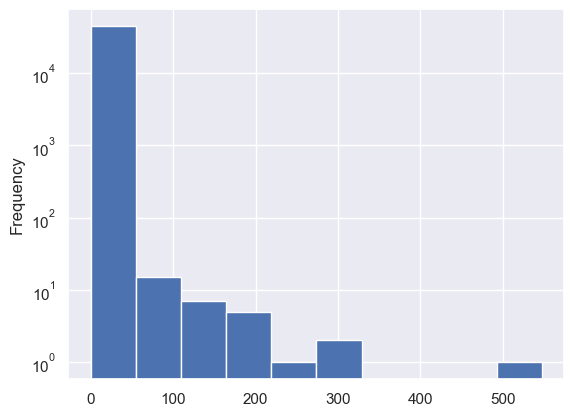

In [189]:
df['popularity'].plot(logy=True, kind='hist')

como se puede observar hay una distribucion sesgada por lo que debe a la gran popularidad de unas peliculas y casi nula de otras.

C:\Users\Leo\AppData\Local\Temp\ipykernel_12116\2251587667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['popularity'].fillna(df['popularity'].median()))


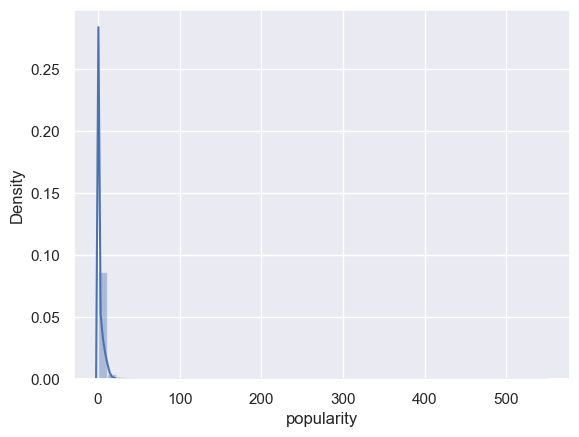

In [190]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

CORRELACIONES A TENER EN CUENTA

In [191]:
df= df.drop(columns=['title','genres'], axis=1)

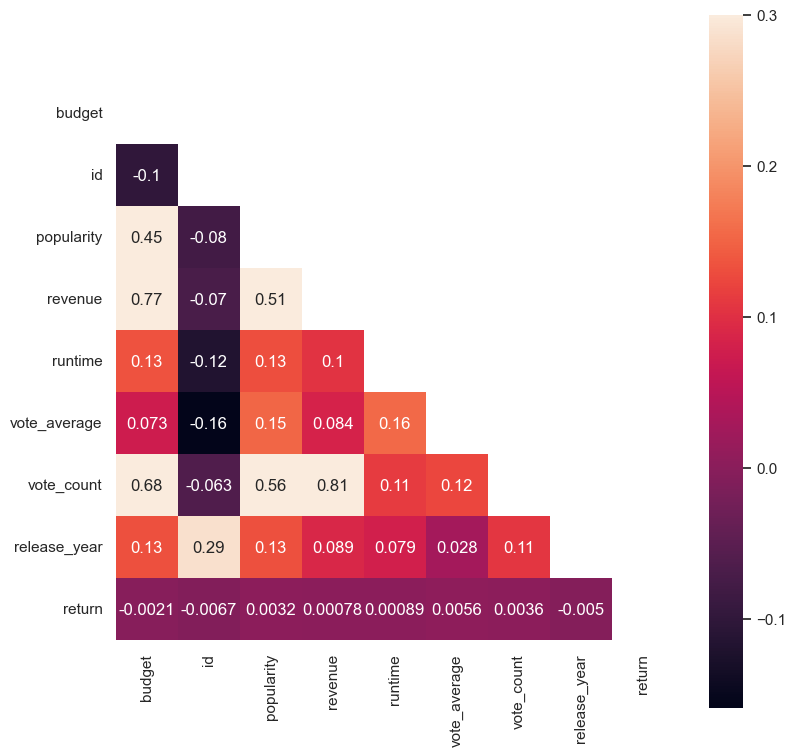

In [192]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

podemos observar algunas pequeñas correlaciones como popularity con vote_count

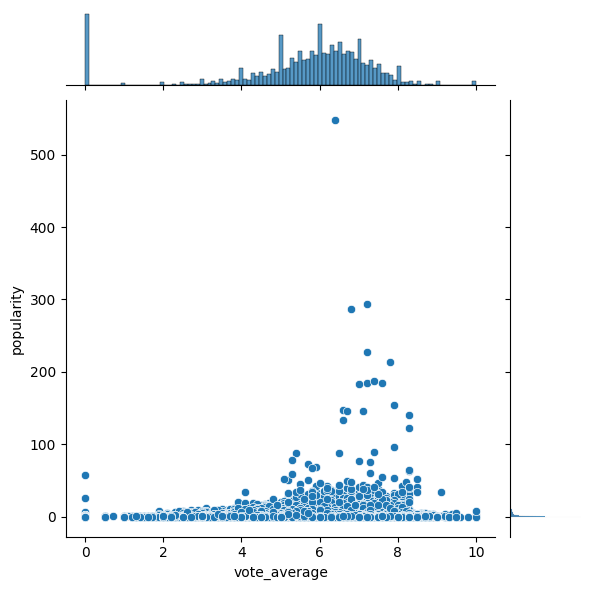

In [170]:
sns.jointplot(x='vote_average', y='popularity', data=df)

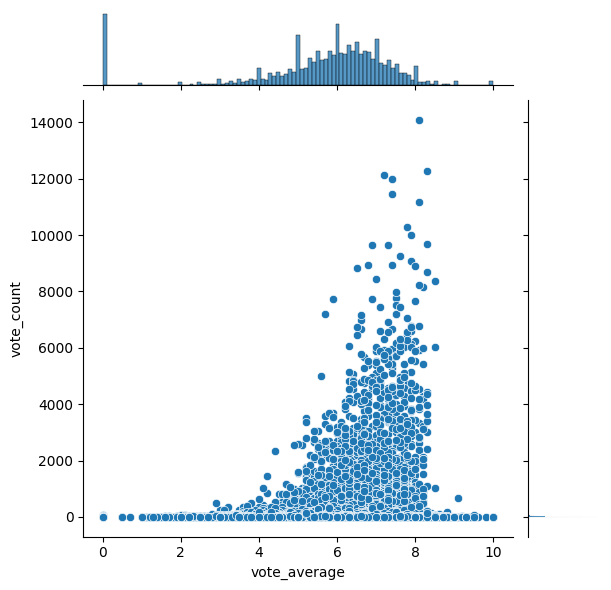

In [171]:
sns.jointplot(x='vote_average', y='vote_count', data=df)